In [40]:
import urllib.request
import json
import pandas as pd
from pandas.io.json import json_normalize
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta

In [41]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family = 'Malgun Gothic')

%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False

In [42]:
key = '70564c7369726172313135416c615451'
start_date = date(2019,1,1)
columns_name = (['USE_MON', 'LINE_NUM', 'SUB_STA_NM', 'PAY_RIDE_NUM', 'FREE_RIDE_NUM',
       'PAY_ALIGHT_NUM', 'FREE_ALIGHT_NUM', 'WORK_DT'])
final_data = pd.DataFrame(columns = columns_name ) # 데이터프레임 생성 - 컬럼명 맞추기
for i in range(1, 25):
    target_date = start_date.strftime('%Y%m')
    url = 'http://openapi.seoul.go.kr:8088/%s/json/CardSubwayPayFree/1/1000/%s/'%(key, target_date)
    result = urllib.request.urlopen(url)
    json_raw_data = result.read()
    json_utf8 = json_raw_data.decode('utf-8')
    json_complete = json.loads(json_utf8)
    monthly_plus_data = pd.DataFrame(json_complete['CardSubwayPayFree']['row'])
    final_data = pd.concat([final_data, monthly_plus_data], ignore_index = True)
    plus_month = relativedelta(months=1) # 월 더하기
    start_date = start_date + plus_month
final_data

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM,WORK_DT
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0,20190203
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0,20190203
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0,20190203
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0,20190203
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0,20190203
...,...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0,20210103
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0,20210103
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0,20210103
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0,20210103


In [43]:
final_data.drop(columns = ['WORK_DT'],inplace = True)
final_data

,USE_MON,LINE_NUM,SUB_STA_NM,PAY_RIDE_NUM,FREE_RIDE_NUM,PAY_ALIGHT_NUM,FREE_ALIGHT_NUM
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0
...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0


In [44]:
final_data.columns = ['년/월', '노선번호', '역명', '유임승차', '무임승차', '유임하차', '무임하차']
final_data

,년/월,노선번호,역명,유임승차,무임승차,유임하차,무임하차
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0
...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0


In [45]:
final_data2019 = final_data[:7978]
final_data2020 = final_data[7979:]

In [46]:
final_data2019

,년/월,노선번호,역명,유임승차,무임승차,유임하차,무임하차
0,201901,경의선,곡산,11758.0,4209.0,11719.0,4073.0
1,201901,1호선,종로5가,571824.0,275447.0,583955.0,263687.0
2,201901,1호선,종각,1240810.0,162410.0,1177643.0,152062.0
3,201901,1호선,청량리(서울시립대입구),463456.0,352121.0,482960.0,357571.0
4,201901,1호선,서울역,1516452.0,221180.0,1400464.0,211764.0
...,...,...,...,...,...,...,...
7973,201912,중앙선,망우,182610.0,75024.0,174578.0,75724.0
7974,201912,중앙선,지평,1045.0,643.0,676.0,576.0
7975,201912,중앙선,회기,776871.0,138653.0,740548.0,137673.0
7976,201912,중앙선,도농,254011.0,68531.0,219355.0,66085.0


In [47]:
final_data2020

,년/월,노선번호,역명,유임승차,무임승차,유임하차,무임하차
7979,202001,9호선,염창,426975.0,66334.0,408275.0,65246.0
7980,202001,1호선,제기동,260659.0,335767.0,255740.0,360747.0
7981,202001,1호선,청량리(서울시립대입구),400999.0,316427.0,406766.0,322368.0
7982,202001,1호선,동묘앞,156787.0,141311.0,168473.0,143603.0
7983,202001,1호선,신설동,323258.0,117081.0,316893.0,110677.0
...,...,...,...,...,...,...,...
15169,202012,중앙선,도심,39346.0,11941.0,29495.0,10917.0
15170,202012,중앙선,회기,424237.0,86386.0,405759.0,85103.0
15171,202012,중앙선,도농,168265.0,39617.0,154109.0,38579.0
15172,202012,중앙선,팔당,15173.0,5036.0,15661.0,4852.0


In [48]:
final_data2019 = final_data2019.groupby('노선번호')[['무임승차']].sum()
final_data2019.sort_values(by = '무임승차', axis=0, ascending=True, inplace = True)
final_data2019

,무임승차
노선번호,
장항선,1445968.0
경강선,1860149.0
공항철도 1호선,3456247.0
수인선,3626764.0
경춘선,3741592.0
9호선2~3단계,5052687.0
우이신설선,5319215.0
과천선,6515703.0
안산선,6701519.0


In [49]:
final_data2020 = final_data2020.groupby('노선번호')[['무임승차']].sum()
final_data2020.sort_values(by = '무임승차', axis=0, ascending=True, inplace = True)
final_data2020

,무임승차
노선번호,
장항선,826879.0
경강선,1151354.0
공항철도 1호선,2235697.0
수인선,2800040.0
경춘선,2880457.0
9호선2~3단계,3356551.0
과천선,4064471.0
우이신설선,4198999.0
안산선,4808470.0


In [50]:
final_data_merge = pd.merge(final_data2019,final_data2020, on = '노선번호')
final_data_merge

,무임승차_x,무임승차_y
노선번호,,
장항선,1445968.0,826879.0
경강선,1860149.0,1151354.0
공항철도 1호선,3456247.0,2235697.0
수인선,3626764.0,2800040.0
경춘선,3741592.0,2880457.0
9호선2~3단계,5052687.0,3356551.0
우이신설선,5319215.0,4198999.0
과천선,6515703.0,4064471.0
안산선,6701519.0,4808470.0


In [51]:
final_data_merge.columns = ['무임승차2019', '무임승차2020']
final_data_merge

,무임승차2019,무임승차2020
노선번호,,
장항선,1445968.0,826879.0
경강선,1860149.0,1151354.0
공항철도 1호선,3456247.0,2235697.0
수인선,3626764.0,2800040.0
경춘선,3741592.0,2880457.0
9호선2~3단계,5052687.0,3356551.0
우이신설선,5319215.0,4198999.0
과천선,6515703.0,4064471.0
안산선,6701519.0,4808470.0


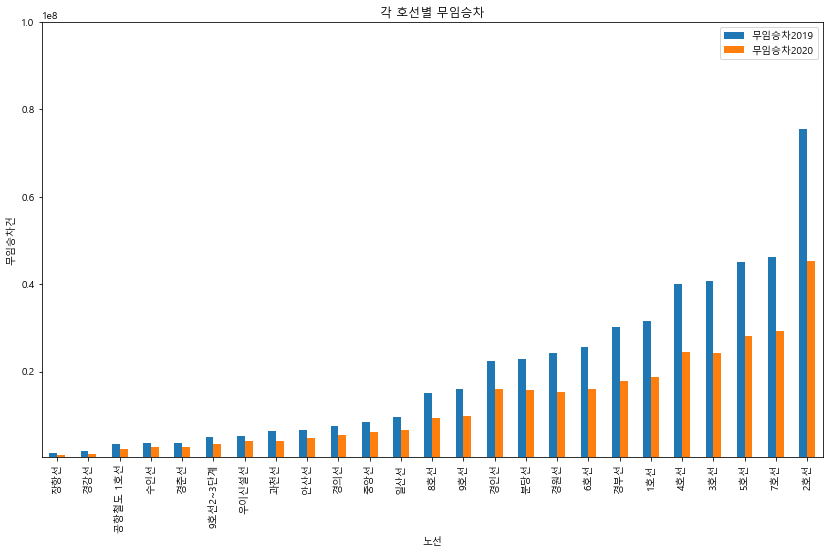

In [66]:
final_data_merge.plot(ylim=(500000, 100000000),kind = 'bar', figsize = (14, 8))
plt.title('각 호선별 무임승차')
plt.xlabel('노선')
plt.ylabel('무임승차건')
plt.show()